<a href="https://colab.research.google.com/github/Komla/fastAI-/blob/main/Deliverables_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.5MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 1.2MB 9.0MB/s 
     |████████████████████████████████| 194kB 19.2MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 12.8MB 272kB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [ ]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url, fname=None, dest=None, c_key='data', force_download=False, extract_func=<function file_extract at 0x7f1251a560e0>, timeout=4)
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz or unzip to folder `dest`.



In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
#this shows you were the file is downloaded to
path.ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [ ]:
# You can get the list of images of SEVENS with specific range Command
fnames = get_image_files_sorted(path/'train/7')
fnames[:5]

(#5) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png')]

In [ ]:
# You can also get the images of SEVENS with this command
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [ ]:
im7_path = sevens[8]
im7 = Image.open(im7_path)
im7

In [ ]:
array(im7)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  13],
       [  0,   0,   0,   0,   0, 147]], dtype=uint8)

In [ ]:
tensor(im7)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  13],
        [  0,   0,   0,   0,   0, 147]], dtype=torch.uint8)

In [ ]:
#Printing the image into a DataFrame to see its computer version
im7_t = tensor(im7)
df = pd.DataFrame(im7_t[4:22,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,73,167,167,107,80,80,101,215,254,158,0
4,0,0,0,0,0,13,155,252,254,254,254,255,254,254,254,254,194,0
5,0,0,0,0,0,147,254,254,249,128,105,106,105,105,156,254,131,0
6,0,0,0,0,0,219,254,248,97,0,0,0,0,0,158,254,131,0
7,0,0,0,0,0,151,197,49,0,0,0,0,0,0,228,246,48,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,94,249,137,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,158,254,114,0,0


In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(seven_tensors)
#three_tensors = [tensor(Image.open(o)) for o in threes]
#len(three_tensors),len(seven_tensors)

6265

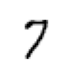

In [ ]:
show_image(seven_tensors[8])

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [ ]:
len(stacked_sevens.shape)

3

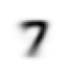

In [ ]:
# How the ideal SEVEN value should look like
mean7 = stacked_sevens.mean(0)
show_image(mean7);

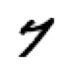

In [ ]:
a_7 = stacked_sevens[1]
show_image(a_7);

In [ ]:
dist_7_abs = (a_7 - mean7).abs().mean()
dist_7_sqr = ((a_7 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1304), tensor(0.2585))

In [ ]:
F.mse_loss(a_7,mean7).sqrt()

tensor(0.2585)

In [ ]:
F.l1_loss(a_7.float(),mean7)

tensor(0.1304)

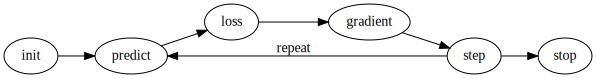

In [ ]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [ ]:
def f(x): return x**2

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


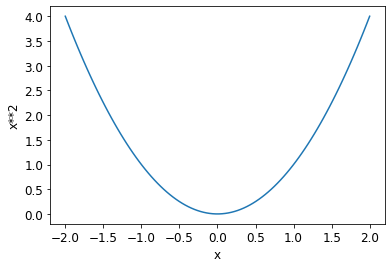

In [ ]:
plot_function(f, 'x', 'x**2')

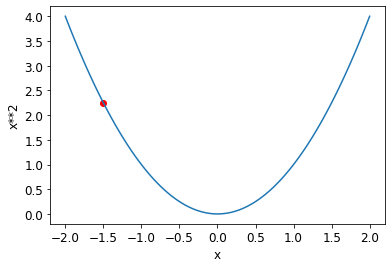

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [ ]:
xt = tensor(7.).requires_grad_()

In [ ]:
yt = f(xt)
yt

tensor(49., grad_fn=<PowBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor(14.)

In [ ]:
help(requires_grad)

Help on function requires_grad in module fastai.torch_core:

requires_grad(m)
    Check if the first parameter of `m` requires grad or not



In [ ]:
xt = tensor([3.,4.,10.]).requires_grad_(True)
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [ ]:
train_x = torch.cat([stacked_sevens]).view(-1, 28*28)

In [ ]:
train_y = torch.cat([stacked_sevens]).view(-1, 28*28)

In [ ]:
train_y = tensor([1]*len(sevens) + [0]*len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12530, 1])

In [ ]:
# Creating a Dataset
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights = init_params((28*28,1))

In [ ]:
bias = init_params(1)

In [ ]:
(train_x[0]*weights.T).sum() + bias

tensor([-14.5278], grad_fn=<AddBackward0>)

In [ ]:
#In Python, matrix multiplication is represented with the @ operator. Let's try it
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[-14.5278],
        [ -3.7420],
        [-15.8293],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

In [ ]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [ ]:
corrects = (preds>0.5).float() == train_x
corrects

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [ ]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [ ]:
# Here's a first try at a loss function that measures the distance between predictions and targets
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [ ]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [ ]:
def sigmoid(x): return 1/(1+torch.exp(-x))

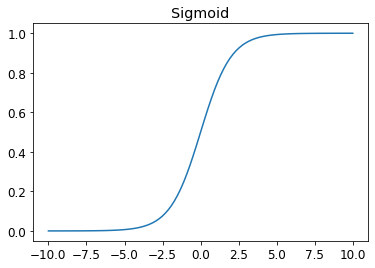

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-10, max=10)

In [ ]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [ ]:
coll = range(15)
dl = DataLoader(coll, batch_size=3, shuffle=True)
list(dl)

[tensor([14,  9,  7]),
 tensor([ 0, 12,  6]),
 tensor([11,  4,  2]),
 tensor([8, 5, 3]),
 tensor([ 1, 13, 10])]